# Model Comparison - Sample size

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from PIL import Image
from Model_comparison_functions import *

Set path:
Two paths here.
 -  One comparing both stochastic and Feature
 - Another looking at bigger samples when Feature increases


### For Stochastic and Feature

In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Sample_size_Sto_Feature\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [4]:
SampleSizes = [2,4,5,7,9,11]

In [5]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=SampleSizes)

In [6]:
print(np.shape(Array))

(1, 6, 88, 5, 2, 1)


[-0.38, -0.18, 0.04000000000000002, 0.24000000000000005]


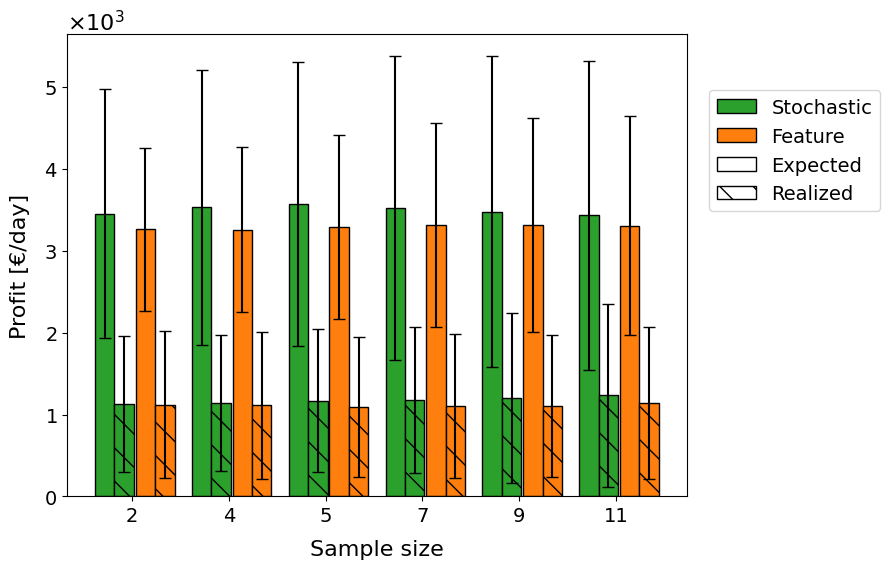

In [7]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5

plot_profit_Test(Array,PlotCase = "Sample size",Selected_models = ['Stochastic','Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Expected','Realized'], barwidth = 0.2,pdf_name = 'Profit_bar_sto_fea_samplesize', ShowEachTestDay = False,save = False)

### Solely the Feature GA

In [8]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Feature_Sample_size\\GA\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [9]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [10]:
SampleSizes = [2,5,10,20,40,80,160,320,365]

In [11]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=SampleSizes)
print(np.shape(Array))

(2, 9, 88, 5, 2, 1)


(1, 9, 88, 5, 2, 1)
[-0.2]


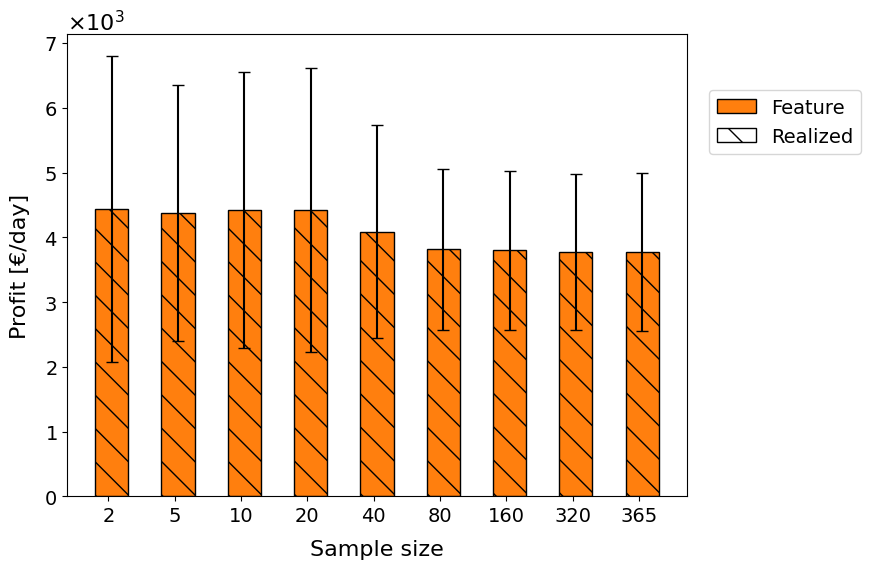

In [12]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
# Assuming `Array` is your original array with shape (N, A, B, C, D, E)
Array_perfect_forecast = Array[0, np.newaxis, :, :, :, :]
print(np.shape(Array_perfect_forecast))

plot_profit_Test(Array_perfect_forecast,PlotCase = "Sample size",Selected_models = ['Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.5,pdf_name = 'Profit_bar_fea_perfect_samplesize', ShowEachTestDay = False,save = False)

(1, 9, 88, 5, 2, 1)
[-0.2]


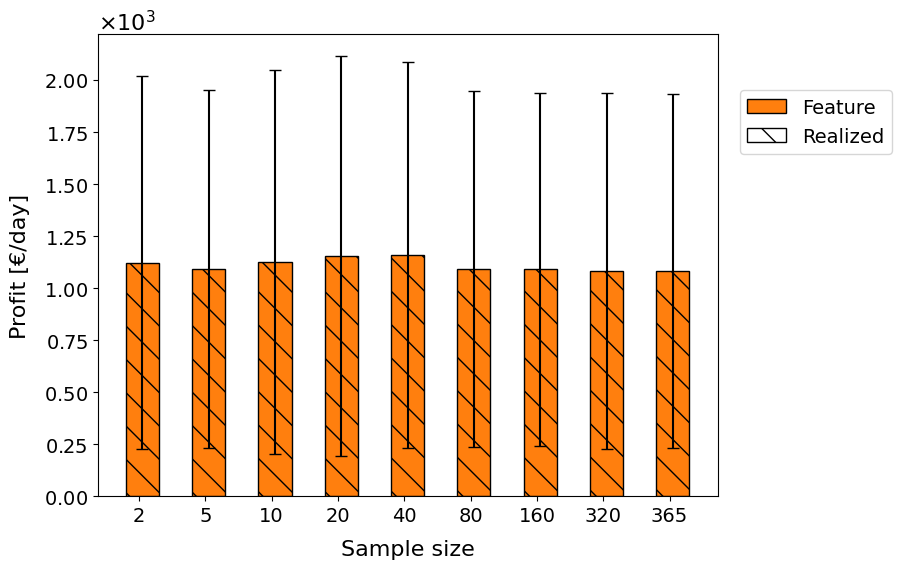

In [13]:
Array_Base_case_forecast = Array[1, np.newaxis, :, :, :, :]
print(np.shape(Array_Base_case_forecast))

plot_profit_Test(Array_Base_case_forecast,PlotCase = "Sample size",Selected_models = ['Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.5,pdf_name = 'Profit_bar_fea_base_samplesize', ShowEachTestDay = False,save = False)

### Solely the Feature HA

In [14]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Feature_Sample_size\\HA\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [18]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [19]:
SampleSizes = [2,5,10,20,40,80,160,320,365]

In [20]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=SampleSizes)
print(np.shape(Array))

(1, 9, 88, 5, 2, 1)


[-0.2]


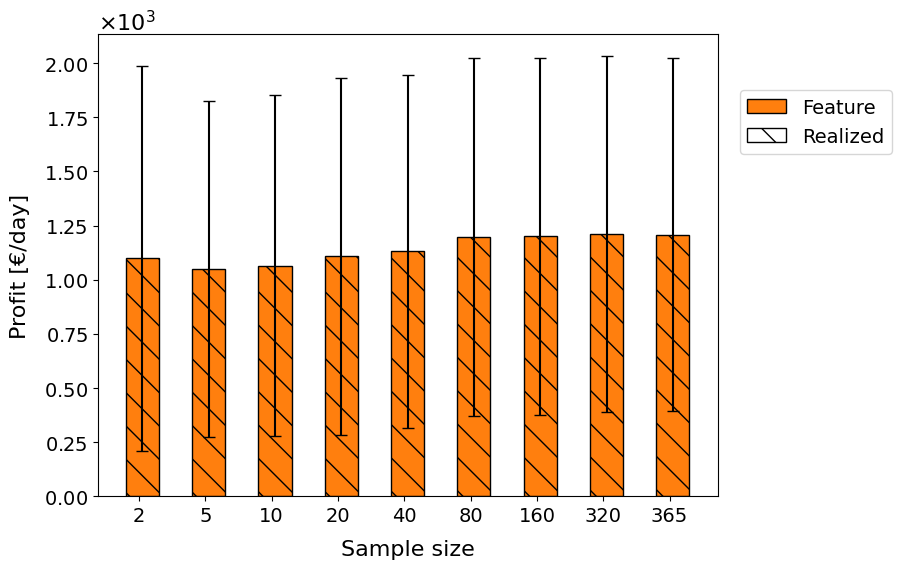

In [21]:
x_axis_tick_label = SampleSizes
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5

plot_profit_Test(Array,PlotCase = "Sample size",Selected_models = ['Feature'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.5,pdf_name = 'Profit_bar_fea_perfect_samplesize', ShowEachTestDay = False,save = False)